**MSc Computational Physics AUTh**<br>
**Academic Year: 2024-2025**<br>
**Master's Thesis**<br>

**Thesis Title:**<br>  
# **"Reconstruction of the EoSs of Exotic Stars using ML and ANNs regression models"**

**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Jupyter Notebook: JN8**<br>
**Name: "metrics_learning_curves_final_results.ipynb"**<br>

**Description:**<br> 
**Obtaining and illustrating the final results of:**<br>
**1. Metrics MSLE and MSE**<br>
**2. Learning curves of DNN models**


**Abbrevations:**<br>
**1. NS -> Neutron Star**<br>
**2. QS -> Quark Star**<br>
**3. ML -> Machine Learning**<br>
**4. DL -> Deep Learning**<br>
**5. DNN -> Deep Neural Network**

## 1. Preliminaries

In [1]:
# Importing useful modules
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [2]:
def make_grouped_bar_plots(x_data_types,reg_models_names,reg_models_files,metric,mag_reg,axis_gbar,bar_colors=None):
    """
    Making grouped bar plots of the selected metric values
    1. metric: the type of metric the values of which are going to be listed. Allowed values: ["msle","mse"]
    2. axis_gbar: the axis where the groups of bar plots will be included
    3. bar_colors: list of the colors of the bars. Bars that correspond to the same type of X data will have the same color. Thus the list must have size equal to the number of different X data types.
    """

    # Allowed inputs for the 'mag_reg' argument
    mag_reg_allowedvalues = ["dpde","enrg","gamma","PcMmax"]
    if mag_reg not in mag_reg_allowedvalues:
        raise ValueError(f"Invalid input \"{mag_reg}\" for the \"mag_reg\" argument. Valid inputs are: {mag_reg_allowedvalues}")
    
    # Allowed inputs for the 'metric' argument
    metric_allowedvalues = ["msle","mse"]
    if metric not in metric_allowedvalues:
        raise ValueError(f"Invalid input \"{metric}\" for the \"metric_type\" argument. Valid inputs are: {metric_allowedvalues}")

    # number of different groups of bars (one group per ML algorithm)
    n = len(reg_models_files) 
    # number of bars per group
    m = len(x_data_types)      

    # Setting the bar width
    bar_width = 1/(n)

    # Setting the fixed-starting position of each bar-group
    start_pos = np.arange(n)

    pos_offsets = np.linspace(-m/2,m/2,m)

    
    # Outer iterative process to include all X data types
    for j in range(0,m):
        ovf_metric_list = []
        test_metric_list = []
        bar_pos = start_pos + pos_offsets[j]*bar_width
        # Inner iterative process to include all Regression models
        for i in range(0,n):
            model_data = joblib.load(reg_models_files[i][j])

            # Getting the summary of results
            ovf_results = model_data["ovf_metrics"]
            test_results = model_data["test_metrics"]
            
            # Getting the average value of MSE or MSLE
            if metric=="mse":
                ovf_metric_value = ovf_results["mse_avg"]
                test_metric_value = test_results["mse_avg"]
                ovf_metric_list.append(ovf_metric_value)
                test_metric_list.append(test_metric_value)
            elif metric=="msle":
                ovf_metric_value = ovf_results["msle_avg"]
                test_metric_value = test_results["msle_avg"]
                ovf_metric_list.append(ovf_metric_value)
                test_metric_list.append(test_metric_value)

            axis_gbar.hlines(ovf_metric_value, bar_pos[i]-bar_width/2, bar_pos[i]+bar_width/2,colors="black",linewidth=3)
            
        
        if bar_colors==None:
            axis_gbar.bar(bar_pos,test_metric_list,bar_width,label=x_data_types[j])
        else:    
            axis_gbar.bar(bar_pos,test_metric_list,bar_width,label=x_data_types[j],color=bar_colors[j])
            
        

    # Setting the title in latex format
    if mag_reg=="dpde":
        y_type_latex = r"$\frac{dP}{dE}$"
    elif mag_reg=="enrg":
        y_type_latex = r"$\epsilon$"
    elif mag_reg=="gamma":
        y_type_latex = r"$Γ$"
    if mag_reg=="PcMmax":
        y_type_latex = r"$P_c(M_{max})$"

   # Adding tick_labels, legend and title for clarity
    axis_gbar.set_xticks(start_pos)
    axis_gbar.set_xticklabels(reg_models_names,fontsize=12)
    axis_gbar.set_ylabel(f"{metric.upper()}",fontsize=12)
    axis_gbar.set_title("Model " + metric.upper() + " Performance and Overfitting (Train/Test Comparison) on predicting " + y_type_latex + " values",fontsize=13)
    axis_gbar.legend(bbox_to_anchor=(1,1.01))


## 2. Metrics Results

### **2.1 Neutron Stars**

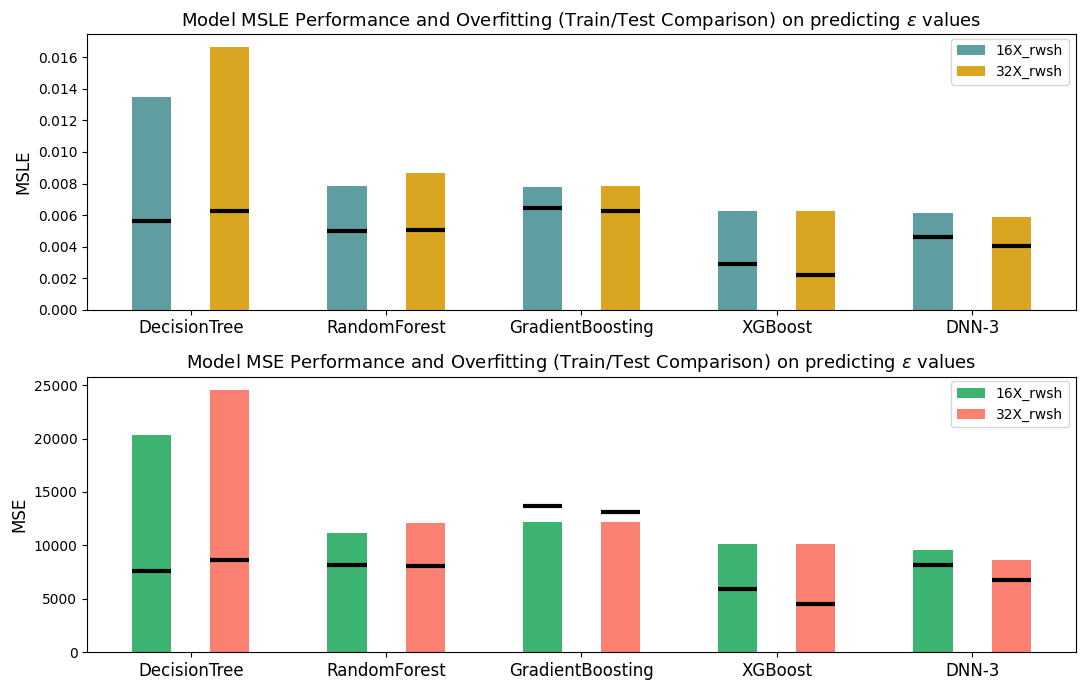

In [3]:
fig_gbar_enrg_NS,axis_gbar_enrg_NS = plt.subplots(2,1,figsize=(11,7))

X_types = ["16X_rwsh","32X_rwsh"]


models_names = ml_names = ["DecisionTree","RandomForest","GradientBoosting","XGBoost","DNN-3"]

models_files = [["linNS_dtree_grid_enrg_16X_rwsh.pkl","linNS_dtree_grid_enrg_32X_rwsh.pkl"],
                ["linNS_rf_grid_enrg_16X_rwsh.pkl","linNS_rf_grid_enrg_32X_rwsh.pkl"],
                ["linNS_gradboost_grid_enrg_16X_rwsh.pkl","linNS_gradboost_grid_enrg_32X_rwsh.pkl"],
                ["linNS_xgboost_grid_enrg_16X_rwsh.pkl","linNS_xgboost_grid_enrg_32X_rwsh.pkl"],
                ["linNS_dnn3_enrg_16X_rwsh.pkl","linNS_dnn3_enrg_32X_rwsh.pkl"]]

bar_clrs_mse = ["mediumseagreen","salmon"]
bar_clrs_msle = ["cadetblue","goldenrod"]

make_grouped_bar_plots(x_data_types=X_types,reg_models_names=models_names,reg_models_files=models_files,metric="msle",mag_reg="enrg",axis_gbar=axis_gbar_enrg_NS[0],bar_colors=bar_clrs_msle)
make_grouped_bar_plots(x_data_types=X_types,reg_models_names=models_names,reg_models_files=models_files,metric="mse",mag_reg="enrg",axis_gbar=axis_gbar_enrg_NS[1],bar_colors=bar_clrs_mse)

fig_gbar_enrg_NS.tight_layout()
#fig_gbar_enrg_NS.savefig("metrics_results_NS.pdf",dpi=300)

### **2.2 Quarks Stars**

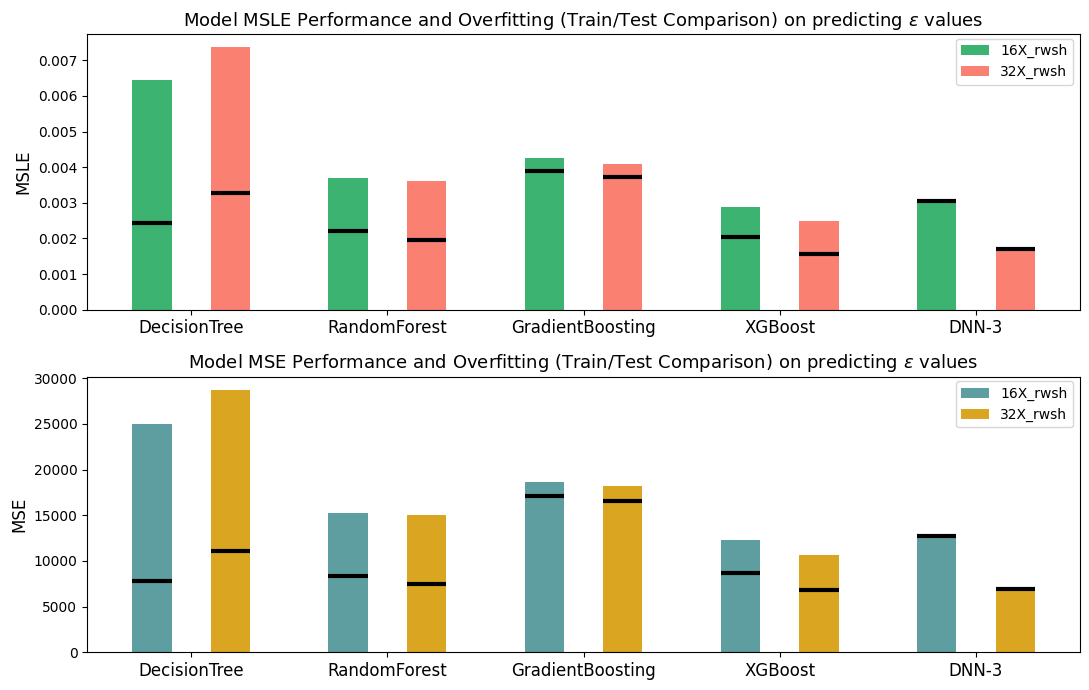

In [4]:
fig_gbar_enrg_QS,axis_gbar_enrg_QS = plt.subplots(2,1,figsize=(11,7))

X_types = ["16X_rwsh","32X_rwsh"]


models_names = ml_names = ["DecisionTree","RandomForest","GradientBoosting","XGBoost","DNN-3"]

models_files = [["QS_dtree_grid_enrg_16X_rwsh.pkl","QS_dtree_grid_enrg_32X_rwsh.pkl"],
                ["QS_rf_grid_enrg_16X_rwsh.pkl","QS_rf_grid_enrg_32X_rwsh.pkl"],
                ["QS_gradboost_grid_enrg_16X_rwsh.pkl","QS_gradboost_grid_enrg_32X_rwsh.pkl"],
                ["QS_xgboost_grid_enrg_16X_rwsh.pkl","QS_xgboost_grid_enrg_32X_rwsh.pkl"],
                ["QS_dnn3_enrg_16X_rwsh.pkl","QS_dnn3_enrg_32X_rwsh.pkl"]]

bar_clrs_msle = ["mediumseagreen","salmon"]
bar_clrs_mse = ["cadetblue","goldenrod"]

make_grouped_bar_plots(x_data_types=X_types,reg_models_names=models_names,reg_models_files=models_files,metric="msle",mag_reg="enrg",axis_gbar=axis_gbar_enrg_QS[0],bar_colors=bar_clrs_msle)
make_grouped_bar_plots(x_data_types=X_types,reg_models_names=models_names,reg_models_files=models_files,metric="mse",mag_reg="enrg",axis_gbar=axis_gbar_enrg_QS[1],bar_colors=bar_clrs_mse)

fig_gbar_enrg_QS.tight_layout()
#fig_gbar_enrg_QS.savefig('metrics_results_QS.pdf',dpi=300)

## 3. Learning curves

### **3.1 Neutron Stars**

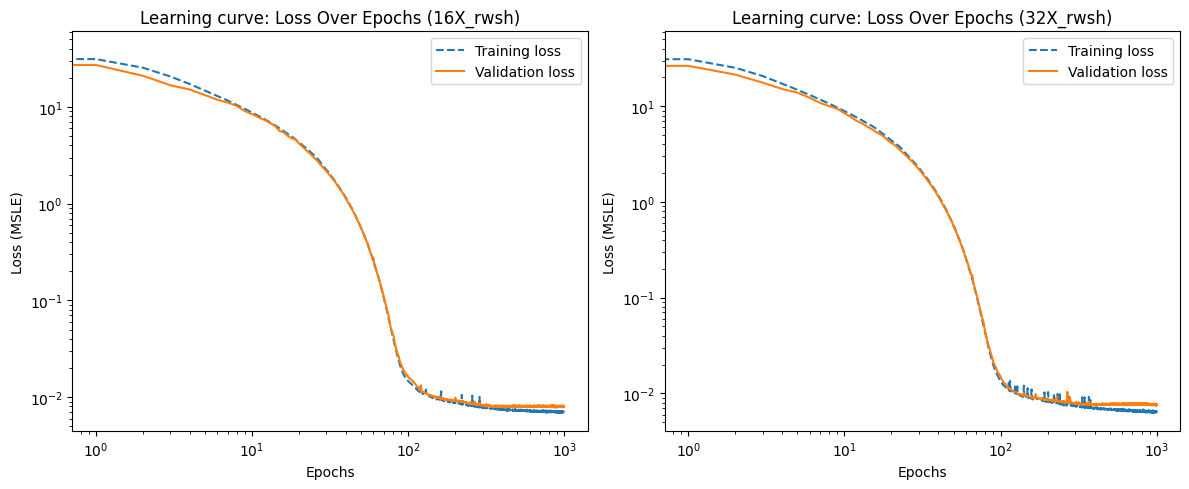

In [5]:
fig_lc_enrg_NS,axis_lc_enrg_NS = plt.subplots(1,2,figsize=(12,5))

dnn_files = ["linNS_dnn3_enrg_16X_rwsh.pkl","linNS_dnn3_enrg_32X_rwsh.pkl"]

X_types = ["16X_rwsh","32X_rwsh"]

for i in range(0,len(dnn_files)):
    dnn_data = joblib.load(dnn_files[i])
    
    learning_curve_info = dnn_data["learning_curve"]
    
    loss_log = learning_curve_info["loss_log"]
    val_loss_log = learning_curve_info["val_loss_log"]

    axis_lc_enrg_NS[i].plot(loss_log,"--",label="Training loss")
    axis_lc_enrg_NS[i].plot(val_loss_log,label="Validation loss")

    axis_lc_enrg_NS[i].set_xlabel("Epochs")
    axis_lc_enrg_NS[i].set_ylabel("Loss (MSLE)")
    axis_lc_enrg_NS[i].set_xscale("log")
    axis_lc_enrg_NS[i].set_yscale("log")
    axis_lc_enrg_NS[i].legend()
    axis_lc_enrg_NS[i].set_title(f"Learning curve: Loss Over Epochs ({X_types[i]})")

fig_lc_enrg_NS.tight_layout()
#fig_lc_enrg_NS.savefig("learning_curve_NS_log.png",dpi=300)        

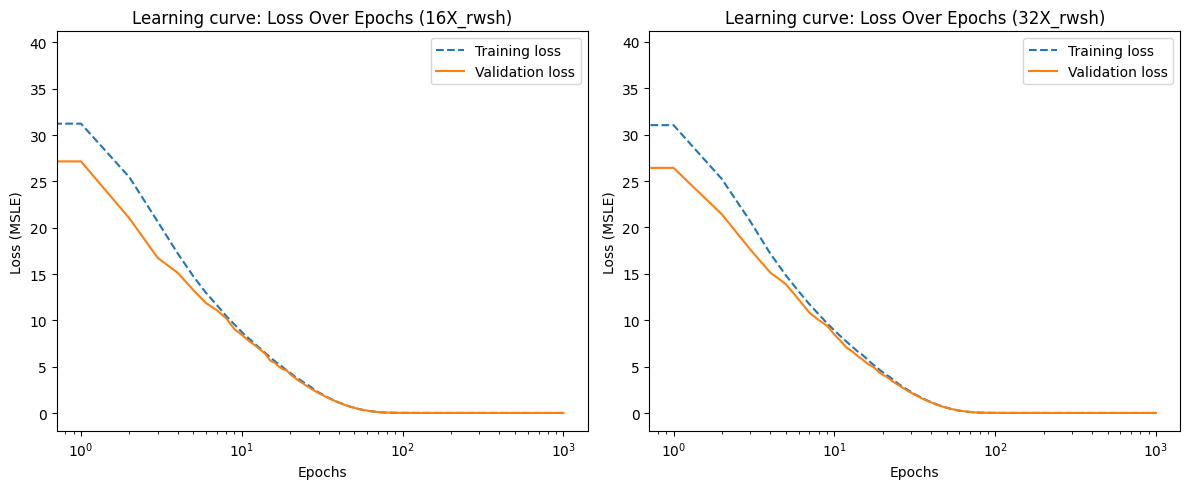

In [6]:
fig_lc_enrg_NS,axis_lc_enrg_NS = plt.subplots(1,2,figsize=(12,5))

dnn_files = ["linNS_dnn3_enrg_16X_rwsh.pkl","linNS_dnn3_enrg_32X_rwsh.pkl"]

X_types = ["16X_rwsh","32X_rwsh"]

for i in range(0,len(dnn_files)):
    dnn_data = joblib.load(dnn_files[i])
    
    learning_curve_info = dnn_data["learning_curve"]
    
    loss_log = learning_curve_info["loss_log"]
    val_loss_log = learning_curve_info["val_loss_log"]

    axis_lc_enrg_NS[i].plot(loss_log,"--",label="Training loss")
    axis_lc_enrg_NS[i].plot(val_loss_log,label="Validation loss")

    axis_lc_enrg_NS[i].set_xlabel("Epochs")
    axis_lc_enrg_NS[i].set_ylabel("Loss (MSLE)")
    axis_lc_enrg_NS[i].set_xscale("log")
    #axis_lc_enrg_NS[i].set_yscale("log")
    axis_lc_enrg_NS[i].legend()
    axis_lc_enrg_NS[i].set_title(f"Learning curve: Loss Over Epochs ({X_types[i]})")

fig_lc_enrg_NS.tight_layout()
#fig_lc_enrg_NS.savefig("learning_curve_NS_log.png",dpi=300)        

### **3.2 Quark Stars**

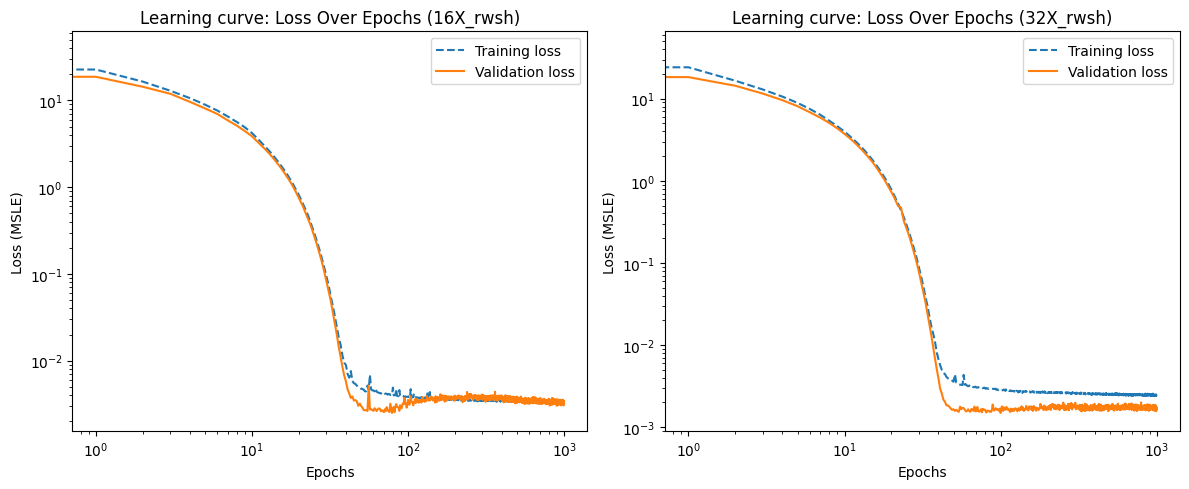

In [7]:
fig_lc_enrg_QS,axis_lc_enrg_QS = plt.subplots(1,2,figsize=(12,5))

dnn_files = ["QS_dnn3_enrg_16X_rwsh.pkl","QS_dnn3_enrg_32X_rwsh.pkl"]

X_types = ["16X_rwsh","32X_rwsh"]

for i in range(0,len(dnn_files)):
    dnn_data = joblib.load(dnn_files[i])
    
    learning_curve_info = dnn_data["learning_curve"]
    
    loss_log = learning_curve_info["loss_log"]
    val_loss_log = learning_curve_info["val_loss_log"]

    axis_lc_enrg_QS[i].plot(loss_log,"--",label="Training loss")
    axis_lc_enrg_QS[i].plot(val_loss_log,label="Validation loss")

    axis_lc_enrg_QS[i].set_xlabel("Epochs")
    axis_lc_enrg_QS[i].set_ylabel("Loss (MSLE)")
    axis_lc_enrg_QS[i].set_xscale("log")
    axis_lc_enrg_QS[i].set_yscale("log")
    axis_lc_enrg_QS[i].legend()
    axis_lc_enrg_QS[i].set_title(f"Learning curve: Loss Over Epochs ({X_types[i]})")

fig_lc_enrg_QS.tight_layout()
#fig_lc_enrg_QS.savefig("learning_curve_QS.png",dpi=300)        

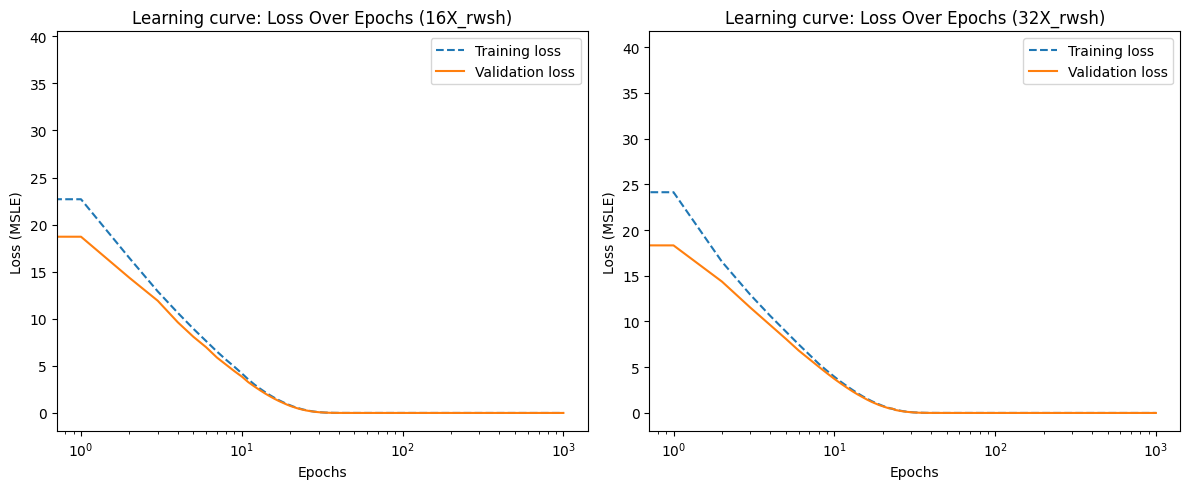

In [8]:
fig_lc_enrg_QS,axis_lc_enrg_QS = plt.subplots(1,2,figsize=(12,5))

dnn_files = ["QS_dnn3_enrg_16X_rwsh.pkl","QS_dnn3_enrg_32X_rwsh.pkl"]

X_types = ["16X_rwsh","32X_rwsh"]

for i in range(0,len(dnn_files)):
    dnn_data = joblib.load(dnn_files[i])
    
    learning_curve_info = dnn_data["learning_curve"]
    
    loss_log = learning_curve_info["loss_log"]
    val_loss_log = learning_curve_info["val_loss_log"]

    axis_lc_enrg_QS[i].plot(loss_log,"--",label="Training loss")
    axis_lc_enrg_QS[i].plot(val_loss_log,label="Validation loss")

    axis_lc_enrg_QS[i].set_xlabel("Epochs")
    axis_lc_enrg_QS[i].set_ylabel("Loss (MSLE)")
    axis_lc_enrg_QS[i].set_xscale("log")
    #axis_lc_enrg_QS[i].set_yscale("log")
    axis_lc_enrg_QS[i].legend()
    axis_lc_enrg_QS[i].set_title(f"Learning curve: Loss Over Epochs ({X_types[i]})")

fig_lc_enrg_QS.tight_layout()
#fig_lc_enrg_QS.savefig("learning_curve_QS.png",dpi=300)        